## Exploración de datos

Realice un análisis exploratorio que permita describir estadística y visualmente el comportamiento de las variables a considerar. Calcule estadísticas descriptivas, realice histogramas, diagramas de caja, diagramas de dispersión, diagramas de violín y otros que permitan comprender cómo se comportan las variables. Documente el análisis realizado.


In [ ]:
import pandas as pd

#Cargar los datos
file_path = 'datos_apartamentos_rent.csv'

df = pd.read_csv(file_path, encoding="latin1",sep=';')
#Se usa Latin1 debido a que hay algunos caracteres que no identifican


print(df.head())


           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [ ]:
#Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [ ]:
#Cuantas respuestas distintas hay por columna
df.nunique()

id               10000
category             3
title             9350
body              9961
amenities         2254
bathrooms           14
bedrooms            10
currency             1
fee                  1
has_photo            3
pets_allowed         3
price             1725
price_display     1726
price_type           3
square_feet       1738
address           6658
cityname          1574
state               51
latitude          2395
longitude         2392
source              12
time              6310
dtype: int64

In [32]:
df['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term'], dtype=object)

In [33]:
df['has_photo'].unique()

array(['Thumbnail', 'Yes', 'No'], dtype=object)

In [34]:
df["pets_allowed"].unique()

array([nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [35]:
df['price_type'].unique()

array(['Monthly', 'Weekly', 'Monthly|Weekly'], dtype=object)

In [36]:
df['source'].unique()

array(['RentLingo', 'Listanza', 'ListedBuy', 'RentDigs.com', 'GoSection8',
       'RealRentals', 'RENTOCULAR', 'rentbits', 'Home Rentals',
       'Real Estate Agent', 'RENTCafé', 'tenantcloud'], dtype=object)

In [37]:
df.describe()

id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.568781e+09  
50%      38.809800   -93.651600  1.577358e+09  
75%      41.349800   -82.209975  1.577359e+09  
max      61.594000   -70.191600  1.577362e+09

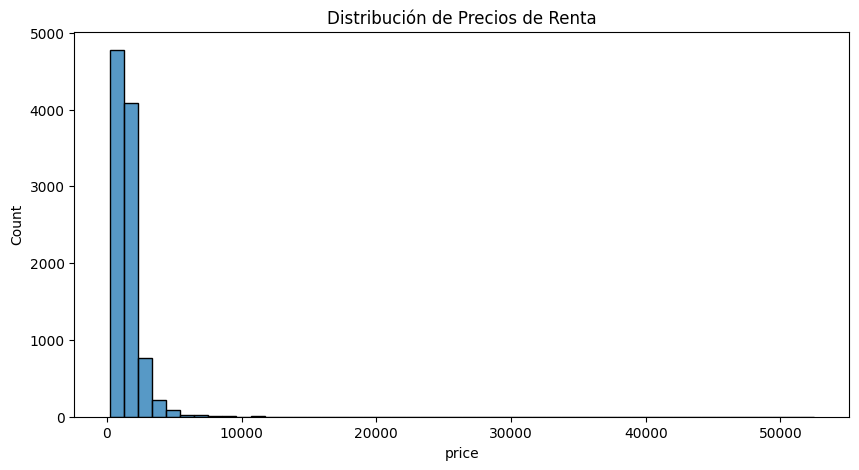

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()

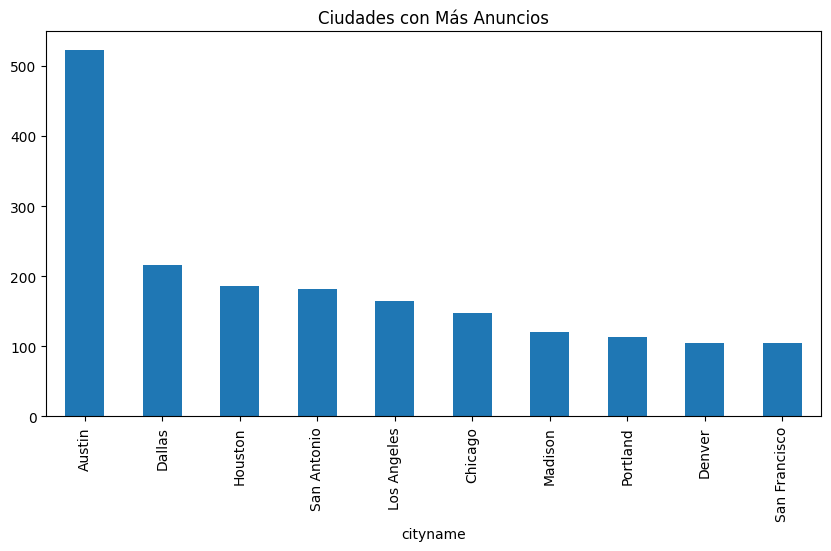

In [ ]:
#Se grafica mediante un histograma las 10 ciudades con más anuncios
plt.figure(figsize=(10,5))
df["cityname"].value_counts().head(10).plot(kind="bar")
plt.title("Ciudades con Más Anuncios")
plt.show()

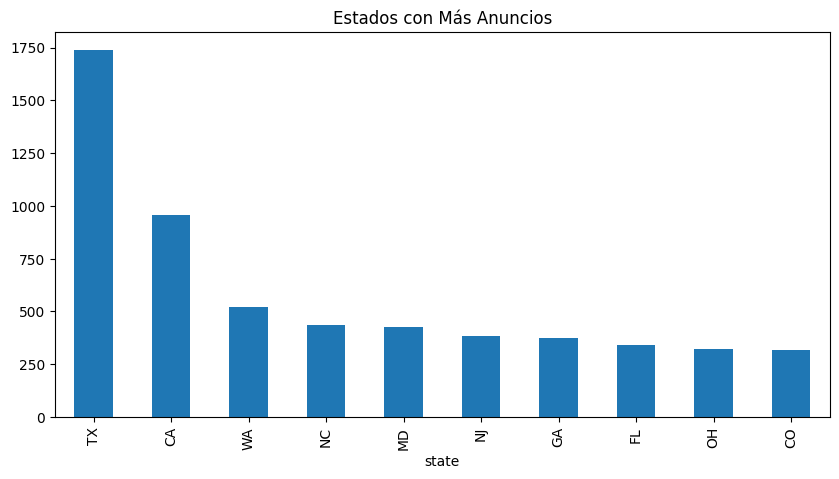

In [ ]:
#Se grafican los 10 estados con más anuncios
plt.figure(figsize=(10,5))
df["state"].value_counts().head(10).plot(kind="bar")
plt.title("Estados con Más Anuncios")
plt.show()

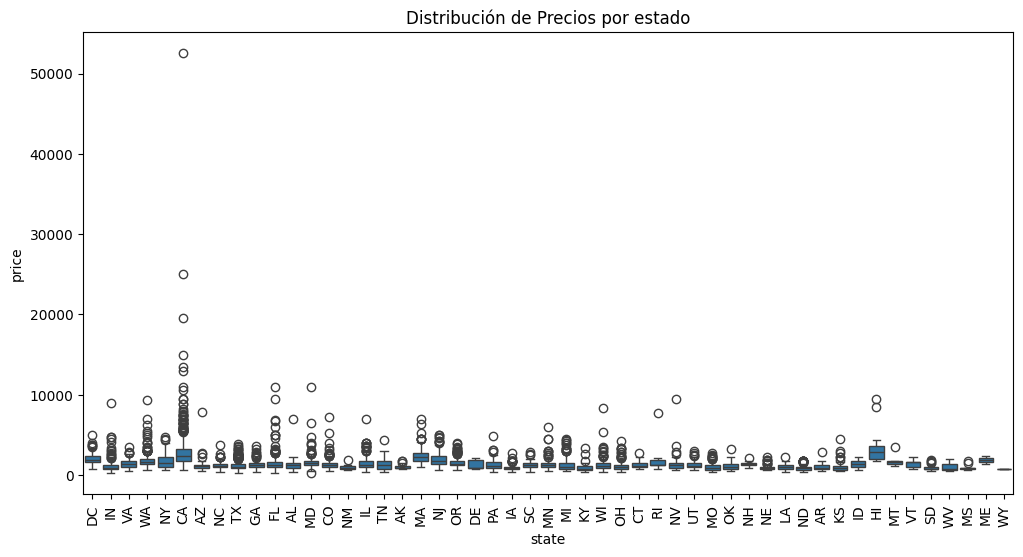

In [ ]:
#Boxplot de precios por estado para identificar posibles outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="state", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de Precios por estado")
plt.show()

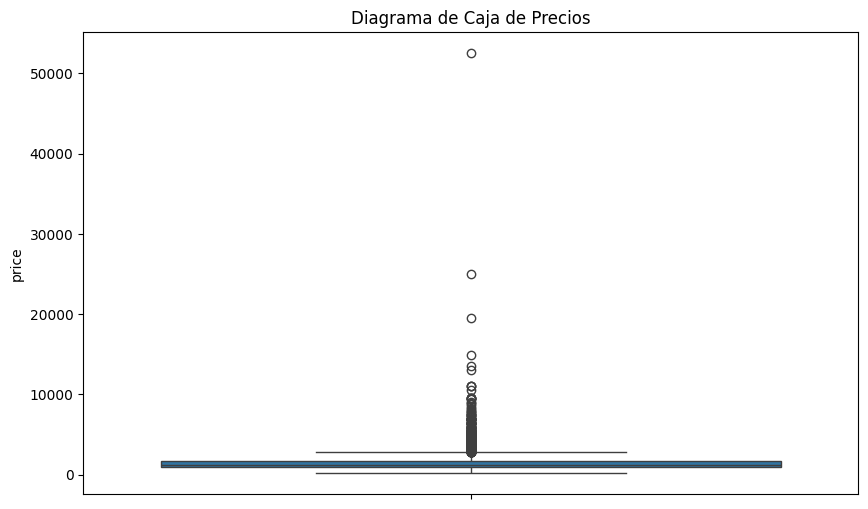

In [ ]:
#Boxplot general
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Diagrama de Caja de Precios')
plt.show()


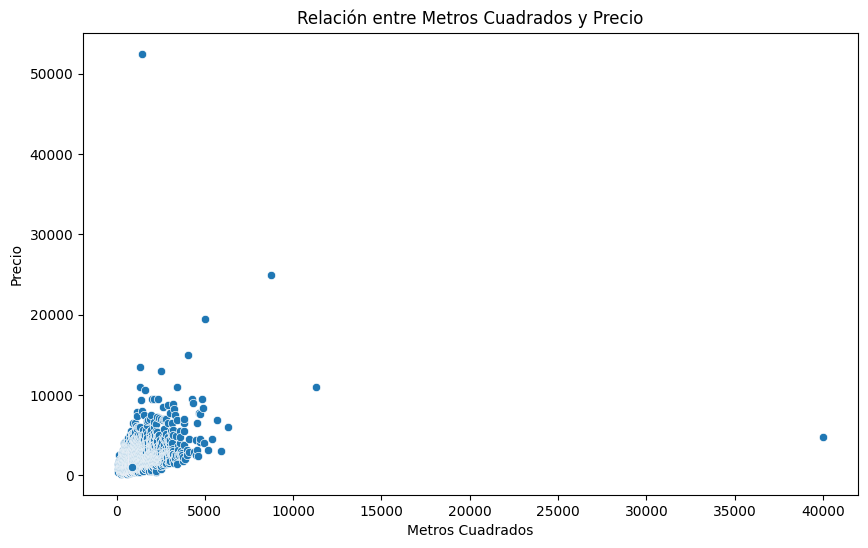

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['square_feet'], y=df['price'])
plt.title('Relación entre Metros Cuadrados y Precio')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio')
plt.show()

In [44]:
columnas = df.columns.tolist()
for i in columnas:
    print(i,df[i].isnull().sum())

id 0
category 0
title 0
body 0
amenities 3549
bathrooms 34
bedrooms 7
currency 0
fee 0
has_photo 0
pets_allowed 4163
price 0
price_display 0
price_type 0
square_feet 0
address 3327
cityname 77
state 77
latitude 10
longitude 10
source 0
time 0


In [ ]:
import folium
from folium.plugins import HeatMap

df_mapa = df.dropna(subset=['latitude', 'longitude'])
# Definir el centro del mapa (puedes usar la media de latitud y longitud)
map_center = [df_mapa["latitude"].mean(), df_mapa["longitude"].mean()]

# Crear el mapa
m = folium.Map(location=map_center, zoom_start=12)

# Agregar cada punto al mapa
for _, row in df_mapa.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,  # Tamaño del punto
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.5
    ).add_to(m)

m


In [49]:
import folium
from folium.plugins import HeatMap

# Filtrar los valores nulos en latitud y longitud
df_mapa = df.dropna(subset=['latitude', 'longitude'])

# Definir el centro del mapa
map_center = [df_mapa["latitude"].mean(), df_mapa["longitude"].mean()]

# Crear el mapa base
m = folium.Map(location=map_center, zoom_start=12)

# Preparar los datos para el HeatMap
heat_data = df_mapa[['latitude', 'longitude']].values.tolist()

# Agregar la capa de calor
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Mostrar el mapa
m
